In [2]:
import allel
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import zscore
import scipy
from statistics import mean
import seaborn as sns
from variables import *

%load_ext rpy2.ipython

In [1]:
df = pd.read_csv("../script_results/Neanderthal/intersection/int_HGDP_Adygei_Neanderthal_HGDP_Balochi_Neanderthal_0.5.txt", header = 0, sep = '\t')
df

NameError: name 'pd' is not defined

In [23]:
%%bash

cat ../script_results/tables/div_Human*.txt > ../script_results/tables/div_Human_all.txt

In [5]:
df = pd.read_csv("../script_results/tables/div_Human_all.txt", header = 0, sep = '\t')
df

,pop1,pop2,mpd
0,Burusho,Burusho,82471.98317648994
1,Burusho,Hazara,85460.57801597132
2,Burusho,Uygur,85569.8596422339
3,Burusho,Bougainville,88019.30929076285
4,Burusho,PapuanHighlands,88406.95596343397
...,...,...,...
48614,Mozabite,Makrani,77829.26418034291
48615,Mozabite,Kalash,77323.98356071419
48616,Mozabite,Pathan,77658.86526713379
48617,Mozabite,Sindhi,78146.30684375069


In [3]:
%%bash

chroms="1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22"

for chrom in $chroms
do
    cat ../script_results/Neanderthal/divergence/div*Neanderthal*chr$chrom*AFR.txt > ../script_results/tables/div_Neanderthal_chr$chrom*AFR.txt
done

In [4]:
%%bash

cat ../script_results/tables/div_Neanderthal_chr*AFR.txt > ../script_results/tables/div_Neanderthal_all_AFR.txt

In [ ]:
# Make plot:
    result = df_sklearn.pivot(index='pop1',columns='pop2',values='D')

    column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
    row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

    #table3 = result[column_order][row_order]
    #table4 = table3.reindex(row_order)

    fig, ax = plt.subplots(figsize=(10, 8))
    heat_map = sns.heatmap(result,linewidth = 0, xticklabels=True,yticklabels=True, cmap = sns.color_palette("blend:#1B0E0A,#8A1418,#E41D26,#ED5623,#F8B40D,#F8EC3A,#FCF7C1", as_cmap=True), cbar_kws={'label': 'Normalized nucleotide divergence'})
    heat_map.set_xlabel('')
    heat_map.set_ylabel('')
    heat_map.text(x=0.5, y=1.03, s='Heatmap of nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
    heat_map.text(x=0.5, y=1.01, s='Denisova chromosome {}'.format(chrom), fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)


    #plt.bar_label('Normalized nucleotide divergence')
    plt.savefig('../script_results/plots/div_whole_genome_chr{}.png'.format(chrom))

In [5]:
df = pd.read_csv("../script_results/tables/div_Neanderthal_all.txt", header = None, sep = '\t')
df.columns = ['pop1','pop2','mpd']
df

,pop1,pop2,mpd
0,Adygei,Adygei,3116.0
1,Adygei,Adygei,2207.5
2,Adygei,Balochi,4912.5
3,Balochi,Adygei,4912.5
4,Balochi,Balochi,2488.5
...,...,...,...
96157,Yi,Yi,756.5
96158,Yi,Tuscan,1643.5
96159,Tuscan,Yi,1643.5
96160,Tuscan,Tuscan,725.5


In [68]:
d = {}
for name, group in df.groupby(['i', 'j']):
    l = []
    for i in group.values:
        if i[2] != 'D':
            l.append(float(i[2]))
    if len(l) > 0:
        d[name[0]+','+name[1]] = mean(l)

In [27]:
df_sklearn.to_csv("moi_table.csv",sep='\t',header=True,index=False)

In [6]:
%%R

library(tidyverse)

Failed to query server: Transport endpoint is not connected


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [22]:
%%bash

head ../script_results/tables/div_Neanderthal_all.txt -n 53442 | tail -n 2

Hezhen	Hezhen	0.034924330616996506	30.0	0
Hezhen	Tuscan	0.03667054714784633		55725000


In [29]:
%%R


read.table("moi_table.csv", header=T) %>%
    head()

                      i          D   pop1           pop2     D_norm
1         Adygei,Adygei 0.02117095 Adygei         Adygei  0.0000000
2        Adygei,Balochi 0.04101684 Adygei        Balochi -0.4136328
3         Adygei,Basque 0.03950754 Adygei         Basque -0.8015427
4        Adygei,Bedouin 0.04067697 Adygei        Bedouin -0.5009830
5 Adygei,BergamoItalian 0.04025861 Adygei BergamoItalian -0.6085063
6   Adygei,Bougainville 0.04457202 Adygei   Bougainville  0.5000938


In [45]:
%%R

read.table("moi_table.csv", header=T) %>% dim()

[1] 2209    5


In [44]:
%%R

read.table("moi_table.csv", header=T) %>%
    filter(pop1 != pop2) %>%
    filter(pop1 %in% c("Bougainville", "PapuanHighlands", "PapuanSepik") | pop2 %in% c("Bougainville", "PapuanHighlands", "PapuanSepik")) %>%
    summarize(max_D = max(D), min_D = min(D))

       max_D      min_D
1 0.05076985 0.03938976


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


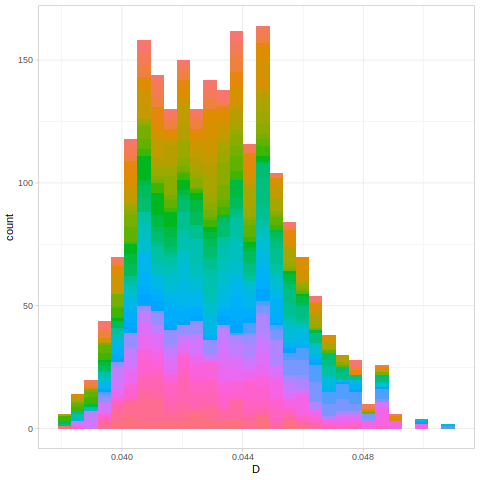

In [39]:
%%R

read.table("moi_table.csv", header=T) %>%
        filter(D > 0.03) %>%
        ggplot() +
        geom_histogram(aes(x = D, fill = pop1), show.legend = F) +
        theme_light()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


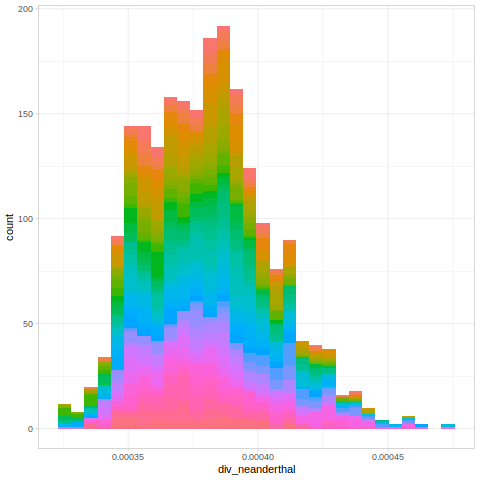

In [9]:
%%R

read.table("../script_results/tables/Neanderthal_summary_table.txt", header=T) %>%
        filter(ratio<1.00) %>%
        ggplot() +
        geom_histogram(aes(x = div_neanderthal, fill = pop1), show.legend = F) +
        theme_light()

In [28]:
%%R
library(tidyverse)
library(reshape2)
library(cowplot)
order <- c('Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite')

color_order <- c('pink','pink','pink','cornflowerblue','cornflowerblue','cornflowerblue','red','red','red','red','red','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','khaki','green','green','green','green','green','green','green','purple','purple','purple','green','pink','pink','pink','pink','pink','pink','khaki')

df <- read.table("../script_results/tables/All_summary_table.txt", header=T)
df <- subset(df, select = c(pop1,pop2,div_whole_genome,div_neanderthal,div_denisova))


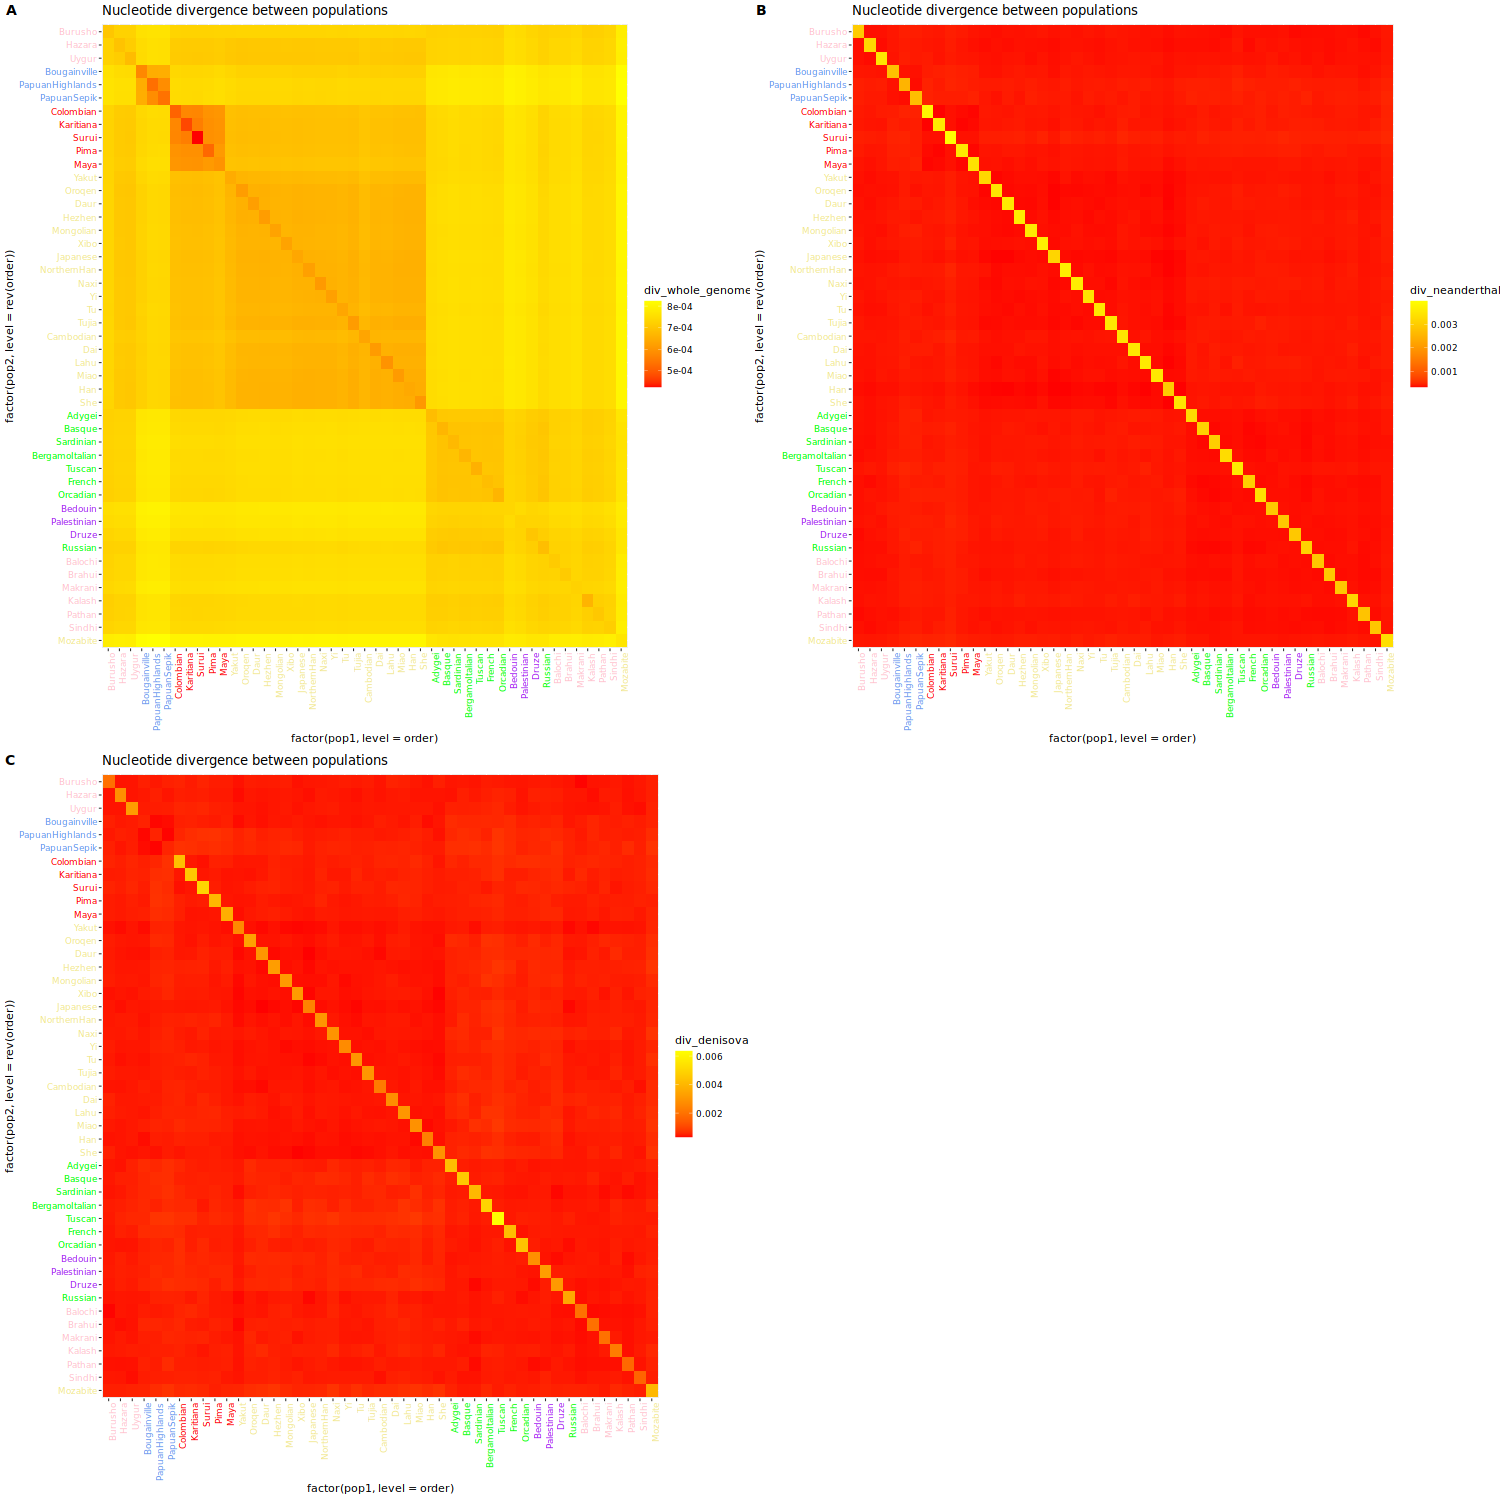

In [29]:
%%R -w 1500 -h 1500

plot_grid(
df %>%
    ggplot() +
    geom_tile(aes(x = factor(pop1, level=order), y = factor(pop2, level=rev(order)), fill = div_whole_genome)) +
    scale_fill_gradient(high = "yellow", low = "red") +
    ggtitle("Nucleotide divergence between populations") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, colour = color_order)) +
    theme(axis.text.y = element_text(hjust = 1, colour = rev(color_order))),
df %>%
    ggplot() +
    geom_tile(aes(x = factor(pop1, level=order), y = factor(pop2, level=rev(order)), fill = div_neanderthal)) +
    scale_fill_gradient(high = "yellow", low = "red") +
    ggtitle("Nucleotide divergence between populations") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, colour = color_order)) +
    theme(axis.text.y = element_text(hjust = 1, colour = rev(color_order))),
df %>%
    ggplot() +
    geom_tile(aes(x = factor(pop1, level=order), y = factor(pop2, level=rev(order)), fill = div_denisova)) +
    scale_fill_gradient(high = "yellow", low = "red") +
    ggtitle("Nucleotide divergence between populations") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, colour = color_order)) +
    theme(axis.text.y = element_text(hjust = 1, colour = rev(color_order))),
labels="AUTO"
)

In [9]:
merged = pd.DataFrame(d.items(), columns = ['i','D'])
merged[['pop1', 'pop2']] = merged["i"].apply(lambda x: pd.Series(str(x).split(",")))
df_sklearn = merged.copy()
# Normalize data using z-score:
df_sklearn = merged.copy()
df_sklearn['D_norm'] = zscore(df_sklearn['D'])
df_sklearn
# Change values in the diagonal to zero:
df_sklearn.loc[df_sklearn['pop1'] == df_sklearn['pop2'], 'D_norm'] = 0

In [16]:
df = pd.read_csv("../script_results/tables/Neanderthal_summary_table.txt", header = 0, sep = '\t')
df

,pop1,pop2,reg1,reg2,number_of_ind1,number_of_ind2,mpd_neanderthal,div_neanderthal,int_mean_frag_length,int_total_seq_length,int_number_of_frags,art1_mean_frag_length,art1_total_seq_length,art1_number_of_frags,art2_mean_frag_length,art2_total_seq_length,art2_number_of_frags,ratio
0,Burusho,Burusho,SAS,SAS,24,24,1385034.5,0.002946,83004.237288,470136000,5664,83004.237288,470136000,5664,83004.237288,470136000,5664,1.000000
1,Hazara,Burusho,SAS,SAS,19,24,80215.0,0.000361,52720.891629,222324000,4217,84074.290159,432310000,5142,83004.237288,470136000,5664,0.514270
2,Uygur,Burusho,SAS,SAS,10,24,66912.0,0.000363,54133.176885,184540000,3409,88113.441132,348753000,3958,83004.237288,470136000,5664,0.529142
3,Bougainville,Burusho,OCE,SAS,11,24,41627.0,0.000384,52949.657869,108335000,2046,100468.928708,263530000,2623,83004.237288,470136000,5664,0.411092
4,PapuanHighlands,Burusho,OCE,SAS,9,24,33415.5,0.000420,50631.277813,79643000,1573,96848.018648,207739000,2145,83004.237288,470136000,5664,0.383380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,Makrani,Mozabite,SAS,MID,25,27,60836.0,0.000386,53635.001702,157526000,2937,82959.946081,430811000,5193,86723.330442,299976000,3459,0.365650
2205,Kalash,Mozabite,SAS,MID,22,27,49733.0,0.000397,54861.086766,125193000,2282,85339.244410,332055000,3891,86723.330442,299976000,3459,0.377025
2206,Pathan,Mozabite,SAS,MID,24,27,60677.0,0.000381,53491.946309,159406000,2980,83494.323144,478005000,5725,86723.330442,299976000,3459,0.333482
2207,Sindhi,Mozabite,SAS,MID,24,27,59379.5,0.000373,54545.734841,159219000,2919,83600.000000,469832000,5620,86723.330442,299976000,3459,0.338885


In [17]:
result = df.pivot(index='pop1',columns='pop2',values='div_neanderthal')
result

pop2,Adygei,Balochi,Basque,Bedouin,BergamoItalian,Bougainville,Brahui,Burusho,Cambodian,Colombian,...,She,Sindhi,Surui,Tu,Tujia,Tuscan,Uygur,Xibo,Yakut,Yi
pop1,,,,,,,,,,,,,,,,,,,,,
Adygei,0.003234,0.000362,0.000355,0.000371,0.000355,0.000382,0.000352,0.000367,0.000392,0.000380,...,0.000375,0.000362,0.000402,0.000378,0.000384,0.000359,0.000370,0.000385,0.000369,0.000395
Balochi,0.000362,0.002873,0.000354,0.000369,0.000359,0.000371,0.000347,0.000355,0.000394,0.000386,...,0.000384,0.000359,0.000433,0.000385,0.000403,0.000381,0.000369,0.000392,0.000378,0.000391
Basque,0.000355,0.000354,0.003073,0.000358,0.000353,0.000394,0.000356,0.000364,0.000407,0.000408,...,0.000391,0.000360,0.000439,0.000372,0.000396,0.000358,0.000371,0.000368,0.000373,0.000386
Bedouin,0.000371,0.000369,0.000358,0.002897,0.000365,0.000410,0.000361,0.000361,0.000405,0.000391,...,0.000408,0.000359,0.000436,0.000382,0.000400,0.000351,0.000390,0.000403,0.000383,0.000399
BergamoItalian,0.000355,0.000359,0.000353,0.000365,0.003282,0.000403,0.000351,0.000349,0.000382,0.000392,...,0.000393,0.000370,0.000424,0.000367,0.000396,0.000366,0.000371,0.000382,0.000370,0.000387
Bougainville,0.000382,0.000371,0.000394,0.000410,0.000403,0.002739,0.000385,0.000384,0.000389,0.000410,...,0.000382,0.000375,0.000442,0.000386,0.000375,0.000428,0.000375,0.000389,0.000370,0.000390
Brahui,0.000352,0.000347,0.000356,0.000361,0.000351,0.000385,0.002909,0.000355,0.000382,0.000387,...,0.000371,0.000345,0.000428,0.000380,0.000391,0.000380,0.000353,0.000374,0.000359,0.000379
Burusho,0.000367,0.000355,0.000364,0.000361,0.000349,0.000384,0.000355,0.002946,0.000382,0.000396,...,0.000371,0.000363,0.000421,0.000369,0.000388,0.000377,0.000363,0.000383,0.000367,0.000379
Cambodian,0.000392,0.000394,0.000407,0.000405,0.000382,0.000389,0.000382,0.000382,0.003464,0.000407,...,0.000366,0.000393,0.000458,0.000376,0.000379,0.000388,0.000376,0.000383,0.000368,0.000366


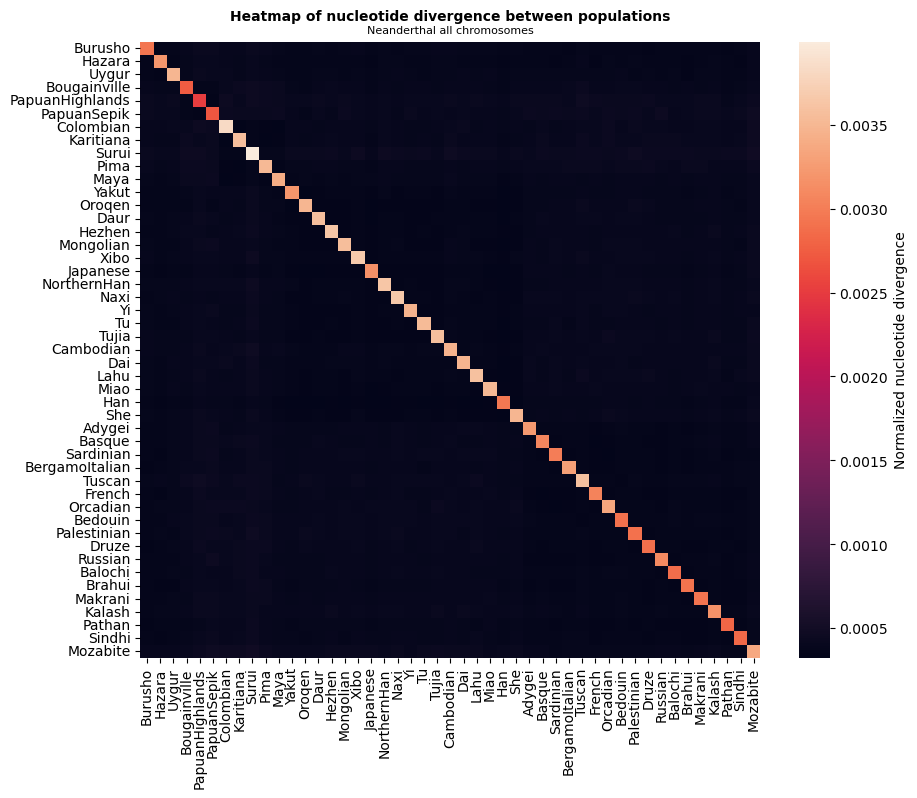

In [22]:
# Make plot:
result = df.pivot(index='pop1',columns='pop2',values='div_neanderthal')

column_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']
row_order = ['Burusho','Hazara','Uygur','Bougainville','PapuanHighlands','PapuanSepik','Colombian','Karitiana','Surui','Pima', 'Maya','Yakut','Oroqen','Daur','Hezhen','Mongolian','Xibo','Japanese','NorthernHan','Naxi','Yi','Tu','Tujia','Cambodian','Dai','Lahu','Miao','Han','She','Adygei','Basque','Sardinian','BergamoItalian','Tuscan','French','Orcadian','Bedouin','Palestinian','Druze','Russian','Balochi','Brahui','Makrani','Kalash','Pathan','Sindhi','Mozabite']

table3 = result[column_order][row_order]
table4 = table3.reindex(row_order)

fig, ax = plt.subplots(figsize=(10, 8))
heat_map = sns.heatmap(table4,linewidth = 0, xticklabels=True,yticklabels=True, cbar_kws={'label': 'Normalized nucleotide divergence'})
heat_map.set_xlabel('')
heat_map.set_ylabel('')
heat_map.text(x=0.5, y=1.03, s='Heatmap of nucleotide divergence between populations', fontsize=10, weight='bold', ha='center', va='bottom', transform=heat_map.transAxes)
heat_map.text(x=0.5, y=1.01, s='Neanderthal all chromosomes', fontsize=8, ha='center', va='bottom', transform=heat_map.transAxes)

plt.savefig('../script_results/plots/div_Neanderthal_all.png')